In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display


from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from sklearn.cluster import DBSCAN

In [3]:
plt.rcParams['figure.figsize'] = [6,4]
plt.rcParams['figure.dpi'] = 200
plt.rcParams["axes.grid"] = False

In [4]:
%store -r WestIndies_2021

In [5]:
WestIndies_2021

,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
11,11,FA Allen (WI),3,1,0,15,15,15.00,7,214.28,...,124,1,1/38,124.00,4.96,150.0,0,0,3,0
12,12,SW Ambris (WI),3,3,0,26,13,8.66,34,76.47,...,-,-,-,-,-,-,-,-,0,0
39,39,NE Bonner (WI),3,3,0,51,31,17.00,95,53.68,...,15,0,-,-,5.29,-,0,0,0,0
41,41,DM Bravo (WI),6,6,1,169,102,33.80,235,71.91,...,-,-,-,-,-,-,-,-,0,0
59,59,SS Cottrell (WI),3,2,1,4,4*,4.00,18,22.22,...,108,3,2/29,36.00,5.68,38.0,0,0,0,0
66,66,J Da Silva (WI),2,2,0,14,9,7.00,35,40.00,...,-,-,-,-,-,-,-,-,1,1
89,89,WIA Fernando (SL),8,8,0,311,118,38.87,368,84.51,...,-,-,-,-,-,-,-,-,3,0
101,101,JN Hamilton (WI),1,1,0,5,5,5.00,16,31.25,...,-,-,-,-,-,-,-,-,0,0
103,103,KJ Harding (WI),1,1,1,1,1*,-,1,100.00,...,88,0,-,-,8.80,-,0,0,0,0
113,113,SO Hetmyer (WI),2,2,0,17,11,8.50,22,77.27,...,-,-,-,-,-,-,-,-,1,0


In [6]:
WestIndies_2021=WestIndies_2021.reset_index()

In [7]:
WestIndies_2021

,index,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,11,11,FA Allen (WI),3,1,0,15,15,15.00,7,...,124,1,1/38,124.00,4.96,150.0,0,0,3,0
1,12,12,SW Ambris (WI),3,3,0,26,13,8.66,34,...,-,-,-,-,-,-,-,-,0,0
2,39,39,NE Bonner (WI),3,3,0,51,31,17.00,95,...,15,0,-,-,5.29,-,0,0,0,0
3,41,41,DM Bravo (WI),6,6,1,169,102,33.80,235,...,-,-,-,-,-,-,-,-,0,0
4,59,59,SS Cottrell (WI),3,2,1,4,4*,4.00,18,...,108,3,2/29,36.00,5.68,38.0,0,0,0,0
5,66,66,J Da Silva (WI),2,2,0,14,9,7.00,35,...,-,-,-,-,-,-,-,-,1,1
6,89,89,WIA Fernando (SL),8,8,0,311,118,38.87,368,...,-,-,-,-,-,-,-,-,3,0
7,101,101,JN Hamilton (WI),1,1,0,5,5,5.00,16,...,-,-,-,-,-,-,-,-,0,0
8,103,103,KJ Harding (WI),1,1,1,1,1*,-,1,...,88,0,-,-,8.80,-,0,0,0,0
9,113,113,SO Hetmyer (WI),2,2,0,17,11,8.50,22,...,-,-,-,-,-,-,-,-,1,0


In [8]:
WestIndies_2021.drop(['index','Unnamed: 0_x'],inplace=True,axis=1)

In [9]:
WestIndies_2021

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,FA Allen (WI),3,1,0,15,15,15.00,7,214.28,0,...,124,1,1/38,124.00,4.96,150.0,0,0,3,0
1,SW Ambris (WI),3,3,0,26,13,8.66,34,76.47,0,...,-,-,-,-,-,-,-,-,0,0
2,NE Bonner (WI),3,3,0,51,31,17.00,95,53.68,0,...,15,0,-,-,5.29,-,0,0,0,0
3,DM Bravo (WI),6,6,1,169,102,33.80,235,71.91,1,...,-,-,-,-,-,-,-,-,0,0
4,SS Cottrell (WI),3,2,1,4,4*,4.00,18,22.22,0,...,108,3,2/29,36.00,5.68,38.0,0,0,0,0
5,J Da Silva (WI),2,2,0,14,9,7.00,35,40.00,0,...,-,-,-,-,-,-,-,-,1,1
6,WIA Fernando (SL),8,8,0,311,118,38.87,368,84.51,1,...,-,-,-,-,-,-,-,-,3,0
7,JN Hamilton (WI),1,1,0,5,5,5.00,16,31.25,0,...,-,-,-,-,-,-,-,-,0,0
8,KJ Harding (WI),1,1,1,1,1*,-,1,100.00,0,...,88,0,-,-,8.80,-,0,0,0,0
9,SO Hetmyer (WI),2,2,0,17,11,8.50,22,77.27,0,...,-,-,-,-,-,-,-,-,1,0


In [10]:
WestIndies_2021_players =WestIndies_2021.copy()

In [11]:
WestIndies_2021_players.drop('Player',axis=1,inplace=True)

In [12]:
WestIndies_2021_players.HS=WestIndies_2021_players.HS.str.extract('(\d+)')
WestIndies_2021_players['HS'].fillna(value=0, inplace=True)


In [13]:
WestIndies_2021_players

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,3,1,0,15,15,15.00,7,214.28,0,0,...,124,1,1/38,124.00,4.96,150.0,0,0,3,0
1,3,3,0,26,13,8.66,34,76.47,0,0,...,-,-,-,-,-,-,-,-,0,0
2,3,3,0,51,31,17.00,95,53.68,0,0,...,15,0,-,-,5.29,-,0,0,0,0
3,6,6,1,169,102,33.80,235,71.91,1,0,...,-,-,-,-,-,-,-,-,0,0
4,3,2,1,4,4,4.00,18,22.22,0,0,...,108,3,2/29,36.00,5.68,38.0,0,0,0,0
5,2,2,0,14,9,7.00,35,40.00,0,0,...,-,-,-,-,-,-,-,-,1,1
6,8,8,0,311,118,38.87,368,84.51,1,2,...,-,-,-,-,-,-,-,-,3,0
7,1,1,0,5,5,5.00,16,31.25,0,0,...,-,-,-,-,-,-,-,-,0,0
8,1,1,1,1,1,-,1,100.00,0,0,...,88,0,-,-,8.80,-,0,0,0,0
9,2,2,0,17,11,8.50,22,77.27,0,0,...,-,-,-,-,-,-,-,-,1,0


In [14]:
WestIndies_2021_players.replace("-",0,inplace=True)

In [15]:
WestIndies_2021_players.drop('BBI',axis=1,inplace=True)

In [16]:
scaler = StandardScaler()

WestIndies_2021_players_scaled = pd.DataFrame(scaler.fit_transform(WestIndies_2021_players),columns=WestIndies_2021_players.columns)
WestIndies_2021_players_scaled.shape
WestIndies_2021_players_scaled.head()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,-0.387241,-1.064544,-0.763386,-0.627181,-0.521833,-0.155989,-0.835910,3.731842,-0.417029,-0.508987,...,-0.390434,0.537224,-0.265858,3.842134,0.335473,3.865805,0.0,-0.196116,1.206045,-0.282843
1,-0.387241,-0.137361,-0.763386,-0.503329,-0.578190,-0.549132,-0.586369,0.348750,-0.417029,-0.508987,...,-0.390434,-0.713558,-0.531717,-0.580231,-1.126503,-0.594231,0.0,-0.196116,-0.829156,-0.282843
2,-0.387241,-0.137361,-0.763386,-0.221849,-0.070969,-0.031970,-0.022592,-0.210721,-0.417029,-0.508987,...,-0.390434,-0.562254,-0.531717,-0.580231,0.432741,-0.594231,0.0,-0.196116,-0.829156,-0.282843
3,0.819164,1.253415,0.822108,1.106741,1.929737,1.009797,1.271322,0.236807,2.397916,-0.508987,...,-0.390434,-0.713558,-0.531717,-0.580231,-1.126503,-0.594231,0.0,-0.196116,-0.829156,-0.282843
4,-0.387241,-0.600952,0.822108,-0.751032,-0.831801,-0.838098,-0.734245,-0.983031,-0.417029,-0.508987,...,0.663738,0.375832,0.265858,0.703682,0.547695,0.535645,0.0,-0.196116,-0.829156,-0.282843


In [17]:
WestIndies_2021_players_scaled.describe()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
count,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,...,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,27.0,2.700000e+01,2.700000e+01,2.700000e+01
mean,6.990293e-17,4.934325e-17,4.111937e-17,-6.579099e-17,-2.261565e-17,5.037123e-17,-1.644775e-17,-6.167906e-18,9.457455e-17,-8.223874e-18,...,1.151342e-16,-6.373503e-17,-1.644775e-17,5.236295e-17,-2.436323e-16,-9.611653e-17,0.0,-6.579099e-17,-4.111937e-17,6.167906e-17
std,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,...,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,0.0,1.019049e+00,1.019049e+00,1.019049e+00
min,-1.191511e+00,-1.528136e+00,-7.633863e-01,-7.960694e-01,-9.445169e-01,-1.086138e+00,-9.006053e-01,-1.528509e+00,-4.170288e-01,-5.089866e-01,...,-3.904344e-01,-7.135584e-01,-5.317166e-01,-5.802306e-01,-1.126503e+00,-5.942310e-01,0.0,-1.961161e-01,-8.291562e-01,-2.828427e-01
25%,-7.893760e-01,-6.009525e-01,-7.633863e-01,-6.328105e-01,-6.627273e-01,-7.140783e-01,-7.157604e-01,-5.340308e-01,-4.170288e-01,-5.089866e-01,...,-3.904344e-01,-7.135584e-01,-5.317166e-01,-5.802306e-01,-1.126503e+00,-5.942310e-01,0.0,-1.961161e-01,-8.291562e-01,-2.828427e-01
50%,-3.872411e-01,-1.373606e-01,-7.633863e-01,-4.920701e-01,-4.654746e-01,-2.700875e-01,-4.200086e-01,-1.058969e-01,-4.170288e-01,-5.089866e-01,...,-3.904344e-01,-4.512977e-01,-5.317166e-01,-5.802306e-01,1.291456e-01,-5.942310e-01,0.0,-1.961161e-01,-1.507557e-01,-2.828427e-01
75%,8.191638e-01,7.898232e-01,8.221083e-01,2.791873e-01,4.503415e-01,7.161798e-01,3.424765e-01,3.930607e-01,-4.170288e-01,-5.089866e-01,...,-3.904344e-01,2.749628e-01,0.000000e+00,3.550638e-01,5.123248e-01,4.687443e-01,0.0,-1.961161e-01,8.668451e-01,-2.828427e-01
max,2.025569e+00,2.180599e+00,2.407603e+00,2.705552e+00,2.380600e+00,2.758476e+00,2.713112e+00,3.731842e+00,2.397916e+00,2.239541e+00,...,3.826257e+00,2.736179e+00,3.190299e+00,3.842134e+00,2.410536e+00,3.865805e+00,0.0,5.099020e+00,2.562846e+00,3.535534e+00


In [18]:
X =  WestIndies_2021_players_scaled.iloc[:,:].values

In [19]:
X

array([[-0.38724105, -1.06454437, -0.76338629, -0.62718093, -0.52183254,
        -0.15598932, -0.8359096 ,  3.73184226, -0.41702883, -0.5089866 ,
        -0.6681531 , -0.62469505, -0.30756234, -1.5624167 , -0.38724105,
         0.34033298,  0.46106941, -0.3904344 ,  0.53722354, -0.26585829,
         3.84213376,  0.33547283,  3.86580519,  0.        , -0.19611614,
         1.20604538, -0.28284271],
       [-0.38724105, -0.13736056, -0.76338629, -0.50332937, -0.57819046,
        -0.54913203, -0.58636902,  0.34874983, -0.41702883, -0.5089866 ,
        -0.6681531 , -0.34358228, -0.30756234, -1.55114626, -0.38724105,
        -0.76234588, -0.63904318, -0.3904344 , -0.71355838, -0.53171657,
        -0.58023058, -1.12650314, -0.59423099,  0.        , -0.19611614,
        -0.8291562 , -0.28284271],
       [-0.38724105, -0.13736056, -0.76338629, -0.22184857, -0.07096923,
        -0.03196954, -0.02259215, -0.21072101, -0.41702883, -0.5089866 ,
         1.13586028, -0.34358228, -0.70299964, -1.2468

In [20]:
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

'from sklearn.cross_validation import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)'

In [21]:
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

'from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)\nsc_y = StandardScaler()\ny_train = sc_y.fit_transform(y_train)'

In [22]:
np.any(np.isnan(WestIndies_2021_players_scaled))

False

In [23]:
WestIndies_2021_players_scaled

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,-0.387241,-1.064544,-0.763386,-0.627181,-0.521833,-0.155989,-0.835910,3.731842,-0.417029,-0.508987,...,-0.390434,0.537224,-0.265858,3.842134,0.335473,3.865805,0.0,-0.196116,1.206045,-0.282843
1,-0.387241,-0.137361,-0.763386,-0.503329,-0.578190,-0.549132,-0.586369,0.348750,-0.417029,-0.508987,...,-0.390434,-0.713558,-0.531717,-0.580231,-1.126503,-0.594231,0.0,-0.196116,-0.829156,-0.282843
2,-0.387241,-0.137361,-0.763386,-0.221849,-0.070969,-0.031970,-0.022592,-0.210721,-0.417029,-0.508987,...,-0.390434,-0.562254,-0.531717,-0.580231,0.432741,-0.594231,0.0,-0.196116,-0.829156,-0.282843
3,0.819164,1.253415,0.822108,1.106741,1.929737,1.009797,1.271322,0.236807,2.397916,-0.508987,...,-0.390434,-0.713558,-0.531717,-0.580231,-1.126503,-0.594231,0.0,-0.196116,-0.829156,-0.282843
4,-0.387241,-0.600952,0.822108,-0.751032,-0.831801,-0.838098,-0.734245,-0.983031,-0.417029,-0.508987,...,0.663738,0.375832,0.265858,0.703682,0.547695,0.535645,0.0,-0.196116,-0.829156,-0.282843
5,-0.789376,-0.600952,-0.763386,-0.638440,-0.690906,-0.652068,-0.577127,-0.546551,-0.417029,-0.508987,...,-0.390434,-0.713558,-0.531717,-0.580231,-1.126503,-0.594231,0.0,-0.196116,-0.150756,3.535534
6,1.623434,2.180599,-0.763386,2.705552,2.380600,1.324187,2.500540,0.546123,2.397916,2.239541,...,-0.390434,-0.713558,-0.531717,-0.580231,-1.126503,-0.594231,0.0,-0.196116,1.206045,-0.282843
7,-1.191511,-1.064544,-0.763386,-0.739773,-0.803622,-0.776088,-0.752729,-0.761354,-0.417029,-0.508987,...,-0.390434,-0.713558,-0.531717,-0.580231,-1.126503,-0.594231,0.0,-0.196116,-0.829156,-0.282843
8,-1.191511,-1.064544,0.822108,-0.784810,-0.916338,-1.086138,-0.891363,0.926387,-0.417029,-0.508987,...,-0.390434,0.174093,-0.531717,-0.580231,1.467325,-0.594231,0.0,-0.196116,-0.829156,-0.282843
9,-0.789376,-0.600952,-0.763386,-0.604662,-0.634548,-0.559054,-0.697276,0.368389,-0.417029,-0.508987,...,-0.390434,-0.713558,-0.531717,-0.580231,-1.126503,-0.594231,0.0,-0.196116,-0.150756,-0.282843


In [24]:
np.all(np.isfinite(WestIndies_2021_players_scaled))

True

K:\4th year\my research practical\jupyter\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


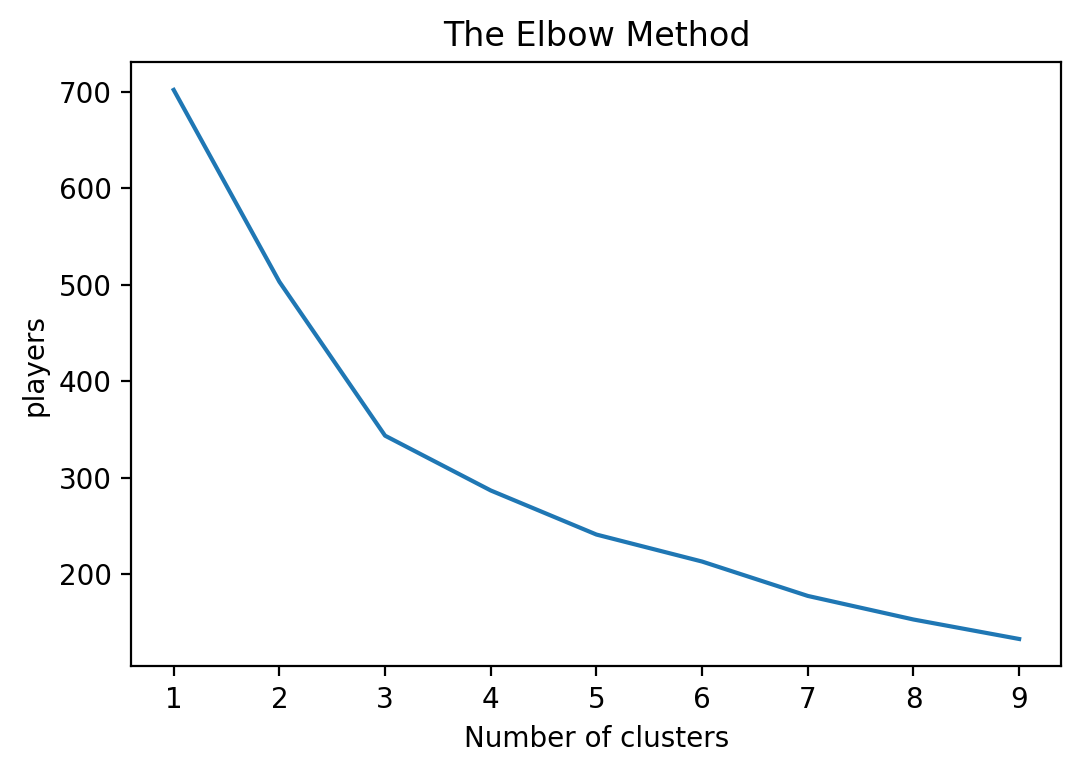

In [25]:
from sklearn.cluster import KMeans
players = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    players.append(kmeans.inertia_)
plt.plot(range(1, 10), players)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('players')
plt.show()

In [26]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)


In [27]:
y_kmeans

array([2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 0, 1, 0, 0, 1, 2, 2, 0, 2, 2, 1,
       1, 2, 2, 2, 2])

In [28]:
kmeans.cluster_centers_

array([[ 1.62343365,  1.13751717,  1.21848196, -0.12895991, -0.25413245,
        -0.22900597,  0.03979299, -0.15266272, -0.41702883, -0.16542064,
         0.68485693, -0.02733041, -0.20870302, -0.10289493,  1.62343365,
         2.17813108,  2.15854312,  1.9814546 ,  2.1587009 ,  1.99393715,
         0.70314668,  0.23157232,  0.73262977,  0.        , -0.19611614,
         1.03644525, -0.28284271],
       [ 0.88618626,  1.17614983,  0.55785921,  1.59839394,  1.6291612 ,
         1.53533043,  1.51778181,  0.50741795,  1.4596009 ,  1.55240913,
         0.23385359,  1.43679861,  1.53781171, -0.0052178 ,  0.88618626,
        -0.51730613, -0.55616803, -0.3904344 , -0.62950046, -0.48740686,
        -0.3186929 , -0.34049455, -0.26716167,  0.        , -0.19611614,
         0.75377836,  0.35355339],
       [-0.69475601, -0.6827628 , -0.48359312, -0.53379553, -0.5152022 ,
        -0.48799757, -0.54505076, -0.14316805, -0.41702883, -0.5089866 ,
        -0.24367937, -0.50067471, -0.49365048,  0.0260

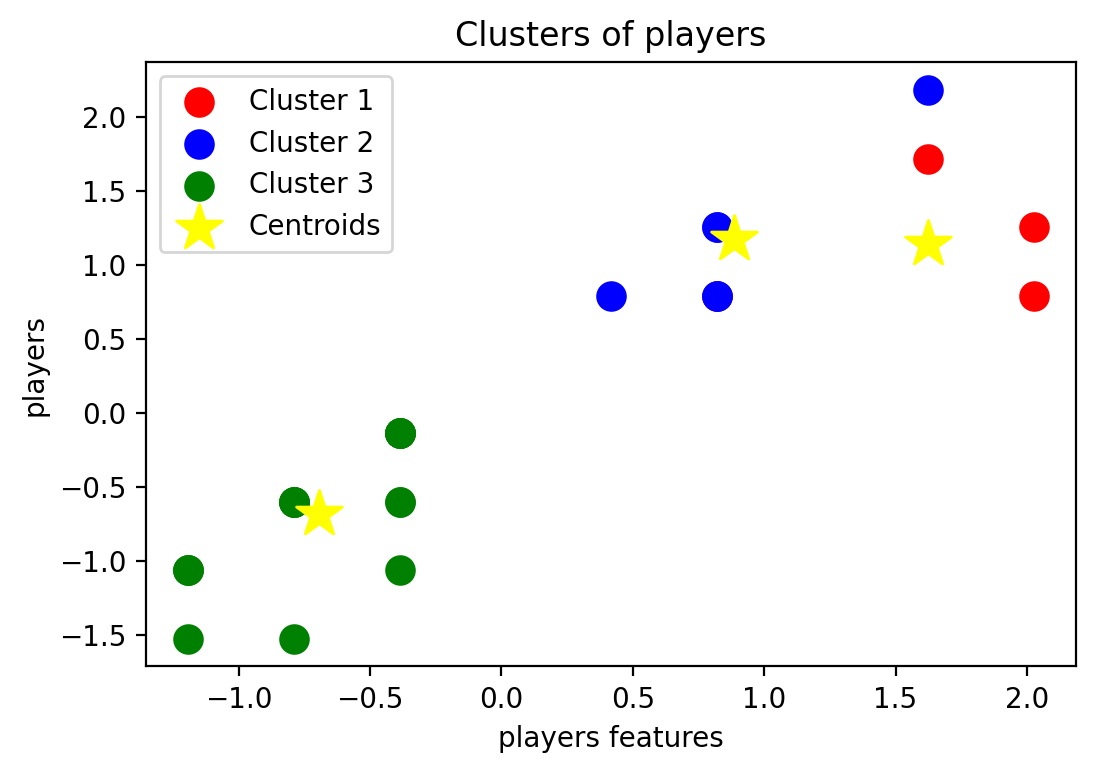

In [29]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300,marker='*', c = 'yellow', label = 'Centroids')
plt.title('Clusters of players')
plt.xlabel('players features')
plt.ylabel('players')
plt.legend()
plt.show()

In [30]:
WestIndies_2021

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,FA Allen (WI),3,1,0,15,15,15.00,7,214.28,0,...,124,1,1/38,124.00,4.96,150.0,0,0,3,0
1,SW Ambris (WI),3,3,0,26,13,8.66,34,76.47,0,...,-,-,-,-,-,-,-,-,0,0
2,NE Bonner (WI),3,3,0,51,31,17.00,95,53.68,0,...,15,0,-,-,5.29,-,0,0,0,0
3,DM Bravo (WI),6,6,1,169,102,33.80,235,71.91,1,...,-,-,-,-,-,-,-,-,0,0
4,SS Cottrell (WI),3,2,1,4,4*,4.00,18,22.22,0,...,108,3,2/29,36.00,5.68,38.0,0,0,0,0
5,J Da Silva (WI),2,2,0,14,9,7.00,35,40.00,0,...,-,-,-,-,-,-,-,-,1,1
6,WIA Fernando (SL),8,8,0,311,118,38.87,368,84.51,1,...,-,-,-,-,-,-,-,-,3,0
7,JN Hamilton (WI),1,1,0,5,5,5.00,16,31.25,0,...,-,-,-,-,-,-,-,-,0,0
8,KJ Harding (WI),1,1,1,1,1*,-,1,100.00,0,...,88,0,-,-,8.80,-,0,0,0,0
9,SO Hetmyer (WI),2,2,0,17,11,8.50,22,77.27,0,...,-,-,-,-,-,-,-,-,1,0


In [31]:
WestIndies_2021["cluster"] = y_kmeans

In [32]:
WestIndies_2021

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,FA Allen (WI),3,1,0,15,15,15.00,7,214.28,0,...,1,1/38,124.00,4.96,150.0,0,0,3,0,2
1,SW Ambris (WI),3,3,0,26,13,8.66,34,76.47,0,...,-,-,-,-,-,-,-,0,0,2
2,NE Bonner (WI),3,3,0,51,31,17.00,95,53.68,0,...,0,-,-,5.29,-,0,0,0,0,2
3,DM Bravo (WI),6,6,1,169,102,33.80,235,71.91,1,...,-,-,-,-,-,-,-,0,0,1
4,SS Cottrell (WI),3,2,1,4,4*,4.00,18,22.22,0,...,3,2/29,36.00,5.68,38.0,0,0,0,0,2
5,J Da Silva (WI),2,2,0,14,9,7.00,35,40.00,0,...,-,-,-,-,-,-,-,1,1,2
6,WIA Fernando (SL),8,8,0,311,118,38.87,368,84.51,1,...,-,-,-,-,-,-,-,3,0,1
7,JN Hamilton (WI),1,1,0,5,5,5.00,16,31.25,0,...,-,-,-,-,-,-,-,0,0,2
8,KJ Harding (WI),1,1,1,1,1*,-,1,100.00,0,...,0,-,-,8.80,-,0,0,0,0,2
9,SO Hetmyer (WI),2,2,0,17,11,8.50,22,77.27,0,...,-,-,-,-,-,-,-,1,0,2


In [33]:
WestIndies_2021['cluster'].value_counts()

2    17
1     6
0     4
Name: cluster, dtype: int64

In [34]:
WestIndies_Cluster_2021 = np.array([4,6,17])

In [35]:
WestIndies_Cluster_2021

array([ 4,  6, 17])

In [36]:
%store WestIndies_Cluster_2021

Stored 'WestIndies_Cluster_2021' (ndarray)


In [37]:
WestIndies_2021_players_scaled.insert(0, 'Player', WestIndies_2021.Player)

In [38]:
WestIndies_2021_players_scaled

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,FA Allen (WI),-0.387241,-1.064544,-0.763386,-0.627181,-0.521833,-0.155989,-0.835910,3.731842,-0.417029,...,-0.390434,0.537224,-0.265858,3.842134,0.335473,3.865805,0.0,-0.196116,1.206045,-0.282843
1,SW Ambris (WI),-0.387241,-0.137361,-0.763386,-0.503329,-0.578190,-0.549132,-0.586369,0.348750,-0.417029,...,-0.390434,-0.713558,-0.531717,-0.580231,-1.126503,-0.594231,0.0,-0.196116,-0.829156,-0.282843
2,NE Bonner (WI),-0.387241,-0.137361,-0.763386,-0.221849,-0.070969,-0.031970,-0.022592,-0.210721,-0.417029,...,-0.390434,-0.562254,-0.531717,-0.580231,0.432741,-0.594231,0.0,-0.196116,-0.829156,-0.282843
3,DM Bravo (WI),0.819164,1.253415,0.822108,1.106741,1.929737,1.009797,1.271322,0.236807,2.397916,...,-0.390434,-0.713558,-0.531717,-0.580231,-1.126503,-0.594231,0.0,-0.196116,-0.829156,-0.282843
4,SS Cottrell (WI),-0.387241,-0.600952,0.822108,-0.751032,-0.831801,-0.838098,-0.734245,-0.983031,-0.417029,...,0.663738,0.375832,0.265858,0.703682,0.547695,0.535645,0.0,-0.196116,-0.829156,-0.282843
5,J Da Silva (WI),-0.789376,-0.600952,-0.763386,-0.638440,-0.690906,-0.652068,-0.577127,-0.546551,-0.417029,...,-0.390434,-0.713558,-0.531717,-0.580231,-1.126503,-0.594231,0.0,-0.196116,-0.150756,3.535534
6,WIA Fernando (SL),1.623434,2.180599,-0.763386,2.705552,2.380600,1.324187,2.500540,0.546123,2.397916,...,-0.390434,-0.713558,-0.531717,-0.580231,-1.126503,-0.594231,0.0,-0.196116,1.206045,-0.282843
7,JN Hamilton (WI),-1.191511,-1.064544,-0.763386,-0.739773,-0.803622,-0.776088,-0.752729,-0.761354,-0.417029,...,-0.390434,-0.713558,-0.531717,-0.580231,-1.126503,-0.594231,0.0,-0.196116,-0.829156,-0.282843
8,KJ Harding (WI),-1.191511,-1.064544,0.822108,-0.784810,-0.916338,-1.086138,-0.891363,0.926387,-0.417029,...,-0.390434,0.174093,-0.531717,-0.580231,1.467325,-0.594231,0.0,-0.196116,-0.829156,-0.282843
9,SO Hetmyer (WI),-0.789376,-0.600952,-0.763386,-0.604662,-0.634548,-0.559054,-0.697276,0.368389,-0.417029,...,-0.390434,-0.713558,-0.531717,-0.580231,-1.126503,-0.594231,0.0,-0.196116,-0.150756,-0.282843


In [39]:
WestIndies_2021_players_scaled[['Player','Ave_x','Ave_y']]

,Player,Ave_x,Ave_y
0,FA Allen (WI),-0.155989,3.842134
1,SW Ambris (WI),-0.549132,-0.580231
2,NE Bonner (WI),-0.031970,-0.580231
3,DM Bravo (WI),1.009797,-0.580231
4,SS Cottrell (WI),-0.838098,0.703682
5,J Da Silva (WI),-0.652068,-0.580231
6,WIA Fernando (SL),1.324187,-0.580231
7,JN Hamilton (WI),-0.776088,-0.580231
8,KJ Harding (WI),-1.086138,-0.580231
9,SO Hetmyer (WI),-0.559054,-0.580231


In [40]:
WestIndies_2021_Ave=WestIndies_2021_players_scaled.mean()

In [41]:
WestIndies_2021_Ave

Mat_x           6.990293e-17
Inns_x          4.934325e-17
NO              4.111937e-17
Runs_x         -6.579099e-17
HS             -2.261565e-17
Ave_x           5.037123e-17
BF             -1.644775e-17
SR_x           -6.167906e-18
100             9.457455e-17
50             -8.223874e-18
0               8.223874e-18
4s             -3.752143e-17
6s              7.401487e-17
Unnamed: 0_y    1.809252e-16
Mat_y           6.990293e-17
Inns_y          5.551115e-17
Overs          -9.046262e-17
Mdns            1.151342e-16
Runs_y         -6.373503e-17
Wkts           -1.644775e-17
Ave_y           5.236295e-17
Econ           -2.436323e-16
SR_y           -9.611653e-17
4               0.000000e+00
5              -6.579099e-17
Ct             -4.111937e-17
St              6.167906e-17
dtype: float64

In [42]:
WestIndies_Ave_2021 =WestIndies_2021_Ave[['Ave_x','Ave_y']]

In [43]:
WestIndies_Ave_2021

Ave_x    5.037123e-17
Ave_y    5.236295e-17
dtype: float64

In [44]:
WestIndies_Ave_2021 = np.array([WestIndies_Ave_2021.Ave_x, WestIndies_Ave_2021.Ave_y])

In [45]:
WestIndies_Ave_2021

array([5.03712298e-17, 5.23629494e-17])

In [46]:
%store WestIndies_Ave_2021

Stored 'WestIndies_Ave_2021' (ndarray)


In [47]:
WestIndies_2021

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,FA Allen (WI),3,1,0,15,15,15.00,7,214.28,0,...,1,1/38,124.00,4.96,150.0,0,0,3,0,2
1,SW Ambris (WI),3,3,0,26,13,8.66,34,76.47,0,...,-,-,-,-,-,-,-,0,0,2
2,NE Bonner (WI),3,3,0,51,31,17.00,95,53.68,0,...,0,-,-,5.29,-,0,0,0,0,2
3,DM Bravo (WI),6,6,1,169,102,33.80,235,71.91,1,...,-,-,-,-,-,-,-,0,0,1
4,SS Cottrell (WI),3,2,1,4,4*,4.00,18,22.22,0,...,3,2/29,36.00,5.68,38.0,0,0,0,0,2
5,J Da Silva (WI),2,2,0,14,9,7.00,35,40.00,0,...,-,-,-,-,-,-,-,1,1,2
6,WIA Fernando (SL),8,8,0,311,118,38.87,368,84.51,1,...,-,-,-,-,-,-,-,3,0,1
7,JN Hamilton (WI),1,1,0,5,5,5.00,16,31.25,0,...,-,-,-,-,-,-,-,0,0,2
8,KJ Harding (WI),1,1,1,1,1*,-,1,100.00,0,...,0,-,-,8.80,-,0,0,0,0,2
9,SO Hetmyer (WI),2,2,0,17,11,8.50,22,77.27,0,...,-,-,-,-,-,-,-,1,0,2
